In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Square Lattice

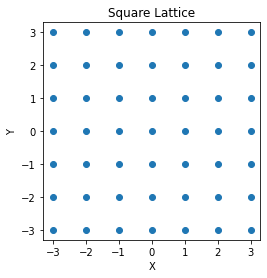

In [26]:
n = 3
N = 2*n+1

x = np.linspace(-n,n,N)

xx, yy = np.meshgrid(x,x)

X = xx.reshape(N**2)
Y = yy.reshape(N**2)

plt.scatter(X,Y)
plt.axis('square');
plt.title('Square Lattice')
plt.xlabel('X')
plt.ylabel('Y');
plt.savefig('Square_Lattice.jpg',bbox_inches = 'tight')

# Graphene (No Bond)

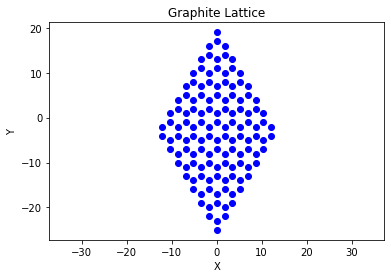

In [25]:
unit_cell   = np.array([[0,1],[0,-1]])
basis_right = np.array([[np.sqrt(3),3],[np.sqrt(3),3]])
basis_left  = np.array([[-np.sqrt(3),3],[-np.sqrt(3),3]])

n = 4
N = np.arange(-n,n,1)


all_pairs = []

for i in N:
    for j in N:
        
        all_pairs.append(unit_cell+basis_right*i+basis_left*j)
        
for pair in all_pairs:
    plt.scatter(pair[0,0],pair[0,1],color='b')
    plt.scatter(pair[1,0],pair[1,1],color='b')
    
plt.axis('equal');
plt.title('Graphite Lattice (no Bond)')
plt.xlabel('X')
plt.ylabel('Y');
plt.savefig('Graphite_Lattice_no_Bond.jpg',bbox_inches = 'tight')

# Graphene (with bond)

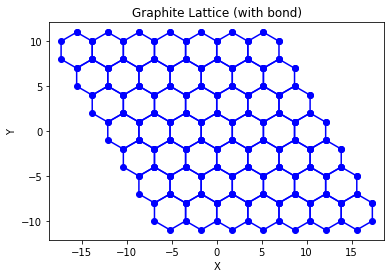

In [36]:
unit_cell = np.array([[0,2],[-np.sqrt(3),1],[-np.sqrt(3),-1],[0,-2],[np.sqrt(3),-1],[np.sqrt(3),1]])
basis_vec = np.array([[2*np.sqrt(3),0],[-np.sqrt(3),3]])

nx = 3
Nx = np.linspace(-nx,nx,2*nx+1)
ny = 3
Ny = np.linspace(-ny,ny,2*ny+1)

Nxx, Nyy = np.meshgrid(Nx,Ny,indexing='ij')

Nxx = Nxx.reshape((2*nx+1)*(2*ny+1))
Nyy = Nyy.reshape((2*nx+1)*(2*ny+1))

N = np.array([Nxx,Nyy])

basis_vec_N = basis_vec.T@N
basis_vec_N = basis_vec_N.T

unit_cell_N   = np.full((len(basis_vec_N),*unit_cell.shape),unit_cell)
basis_vec_N = np.full((len(unit_cell),*basis_vec_N.shape),basis_vec_N)
basis_vec_N = np.transpose(basis_vec_N,(1,0,2))

all_cells = unit_cell + basis_vec_N

for cell in all_cells:
    plt.plot(cell[:,0],cell[:,1],'-o',color='b')
    plt.plot([cell[0,0],cell[-1,0]],[cell[0,1],cell[-1,1]],'-o',color='b')
    
plt.axis('equal');
plt.title('Graphite Lattice (with bond)')
plt.xlabel('X')
plt.ylabel('Y');
plt.savefig('Graphite_Lattice_with_Bond.jpg',bbox_inches = 'tight')

In [11]:
b = np.array([[1,2],[3,4]])
N = np.array([[-1,1],[0,1],[1,1]])

a = b.T@N.T

print(b)
print(N)
print(a)

[[1 2]
 [3 4]]
[[-1  1]
 [ 0  1]
 [ 1  1]]
[[2 3 4]
 [2 4 6]]


In [15]:
u = np.array([[0,2],[-3,1],[3,1]])
N = np.array([[-3,-3],[-3,-2],[-3,-1],[-3,0]])

a = u+N[1]

print(u)
print(a)


[[ 0  2]
 [-3  1]
 [ 3  1]]
[[-3  0]
 [-6 -1]
 [ 0 -1]]


In [30]:
unit_cell = np.array([[0,2],[-np.sqrt(3),1],[-np.sqrt(3),-1],[0,-2],[np.sqrt(3),-1],[np.sqrt(3),1]])
us = np.full((3,*unit_cell.shape),unit_cell)

print(us.shape)
print(us.T.shape)

(3, 6, 2)
(2, 6, 3)


# Graphene (with bond no repeat)

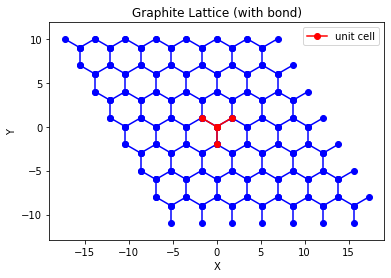

In [2]:
unit_cell = np.array([[0,0],[0,-2],[-np.sqrt(3),1],[np.sqrt(3),1]])
basis_vec = np.array([[2*np.sqrt(3),0],[-np.sqrt(3),3]])

nx = 3
Nx = np.linspace(-nx,nx,2*nx+1)
ny = 3
Ny = np.linspace(-ny,ny,2*ny+1)

Nxx, Nyy = np.meshgrid(Nx,Ny,indexing='ij')

Nxx = Nxx.reshape((2*nx+1)*(2*ny+1))
Nyy = Nyy.reshape((2*nx+1)*(2*ny+1))

N = np.array([Nxx,Nyy])

basis_vec_N = basis_vec.T@N
basis_vec_N = basis_vec_N.T

unit_cell_N   = np.full((len(basis_vec_N),*unit_cell.shape),unit_cell)
basis_vec_N = np.full((len(unit_cell),*basis_vec_N.shape),basis_vec_N)
basis_vec_N = np.transpose(basis_vec_N,(1,0,2))

all_cells = unit_cell + basis_vec_N

for cell in all_cells:
    
    plt.plot([cell[0,0],cell[1,0]],[cell[0,1],cell[1,1]],'-o',color='b')
    plt.plot([cell[0,0],cell[2,0]],[cell[0,1],cell[2,1]],'-o',color='b')
    plt.plot([cell[0,0],cell[3,0]],[cell[0,1],cell[3,1]],'-o',color='b')

i = len(all_cells)//2 
plt.plot([all_cells[i,0,0],all_cells[i,1,0]],[all_cells[i,0,1],all_cells[i,1,1]],'-o',color='r',label='unit cell')
plt.plot([all_cells[i,0,0],all_cells[i,2,0]],[all_cells[i,0,1],all_cells[i,2,1]],'-o',color='r')
plt.plot([all_cells[i,0,0],all_cells[i,3,0]],[all_cells[i,0,1],all_cells[i,3,1]],'-o',color='r')


plt.axis('equal')
plt.title('Graphite Lattice (with bond)')
plt.xlabel('X')
plt.ylabel('Y');
plt.legend()
plt.savefig('Graphite_Lattice_with_Bond_no_repeat.jpg',bbox_inches = 'tight')